## <h1><center>INSURANCE CLAIM'S SEVERITY PREDICTION: A RANDOM FOREST CLASSIFICATION</center></h1>

A random forest algorithm implementation to classify severity of car insurance claims based on the different information the dataset typically provide. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [51]:
df = pd.read_csv('insurance_claims.csv', sep = ';')
pd.set_option('display.max_columns', None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/01/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/01/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,,35100,0,22/02/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/01/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/02/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16/07/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22/02/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05/01/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24/01/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17/02/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23/01/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18/11/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26/02/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [73]:
# Checking for missing values

for column in df.columns:
    unique_values = df[column].unique()
    if pd.isna(unique_values).any():
        print(f"Column '{column}' has missing values.")
    else:
        print("-")

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
Column '_c39' has missing values.
-


In [76]:
# Imposing date frame within the dataset and retrieve the incidents' week days
df['policy_bind_date'] = pd.to_datetime(df.policy_bind_date)
df['incident_date'] = pd.to_datetime(df.incident_date)

df['day_of_week'] = df['incident_date'].dt.day_name()

In [75]:
# Creating a subset with the most relevant variables for the classification
ins_df = df[['months_as_customer',
             'age',
             'property_damage',
             'policy_annual_premium',
             'policy_state',
             'policy_deductable',
             'policy_annual_premium',
             'insured_sex',
             'insured_education_level',
             'insured_occupation',
             'insured_hobbies',
             'insured_relationship',
             'incident_type',
             'collision_type',
             'incident_severity',
             'incident_state',
             'incident_city',
             'incident_hour_of_the_day',
             'number_of_vehicles_involved',
             'property_damage',
             'bodily_injuries',
             'auto_make',
             'auto_model',
             'auto_year',
             'day_of_week',
            ]]

In [57]:
# List of columns to one-hot encode
columns_to_encode = ['policy_state', 
                     'property_damage',
                     'insured_sex',
                     'insured_education_level',
                     'insured_occupation',
                     'insured_hobbies',
                     'insured_relationship',
                     'incident_type',
                     'collision_type',
                     'incident_severity',
                     'incident_state',
                     'incident_city',
                     'auto_make',
                     'auto_model',
                     'day_of_week']

# Apply one-hot encoding to each column
for column in columns_to_encode:
    one_hot_encoded = pd.get_dummies(ins_df[column], prefix=column)
    ins_df = pd.concat([ins_df, one_hot_encoded], axis=1)

# Drop the original categorical columns
ins_df.drop(columns_to_encode, axis=1, inplace=True)

In [58]:
# Combine the incident severity columns into a single target variable by different weighting
ins_df['incident_severity_combined'] = ins_df['incident_severity_Major Damage'] * 3 + \
                                       ins_df['incident_severity_Minor Damage'] * 2 + \
                                       ins_df['incident_severity_Total Loss'] * 4 + \
                                       ins_df['incident_severity_Trivial Damage'] * 1

# Separate features (X) and the combined target variable (y)
X = ins_df.drop(['incident_severity_Major Damage', 
                 'incident_severity_Minor Damage',
                 'incident_severity_Total Loss', 
                 'incident_severity_Trivial Damage',
                 'incident_severity_combined'], 
                 axis=1)

y = ins_df['incident_severity_combined']

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

In [60]:
# Evaluate the model's performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.355
Precision: 0.37027877069723486
Recall: 0.355
F1-score: 0.35875599195600427


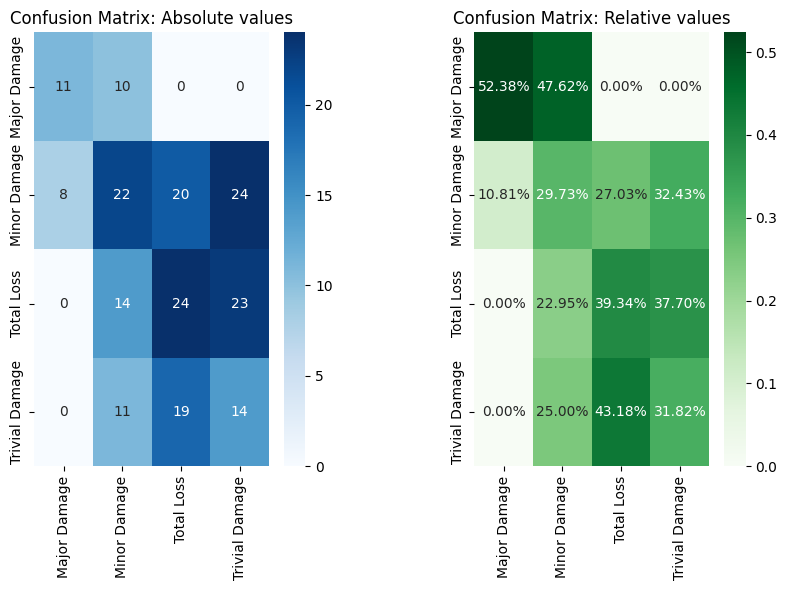

In [81]:
target_classes = ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']

# Build the Absolute Confusion Matrix and Relative Confusion matrix and plot them

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize = (8, 6))

axes[0].set_title('Confusion Matrix: Absolute values')
axes[0].set_xlabel('Predicted Class')
axes[0].set_ylabel('True Class')
sns.heatmap(cm, 
            annot = True, 
            cmap = "Blues", 
            fmt = "d",
            xticklabels = target_classes,
            yticklabels = target_classes,
            ax = axes[0])

axes[1].set_title('Confusion Matrix: Relative values')
axes[1].set_xlabel('Predicted Class')
axes[1].set_ylabel('True Class')
sns.heatmap(cm_percent,
            annot = True, 
            cmap = "Greens", 
            fmt=".2%",
            xticklabels = target_classes,
            yticklabels = target_classes,
            ax = axes[1])

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)